# <font color='crimson'> Preámbulos </font>

Con una compu se pueden resolver sistemas de ecuaciones lineales (_y más_) fácilmente. Basta utilizar la [paquetería adecuada](https://learnpython.com/blog/python-modules-packages-libraries-frameworks/), y entender la forma particular de introducir los datos (o _las variables_) del problema en cuestión.

## <font color='crimson'> Ejemplos </font>

### Ejemplo 1

Primero vamos a resolver este sistema:

\begin{align*}
4x+3y+2z=25 \\
-2x+2y+3z=-10 \\
3x-5y+2z=-4
\end{align*}

> **Nota** Es importante resaltar que las ecuaciones de este sistema están escritas en forma canónica: _incógnitas del lado izquierdo, constantes en el derecho_:
 \begin{align*}A\vec{x}&=\vec{b} \\[2ex]
 \begin{pmatrix}
 4 & 3 & 2 \\
 -2 & 2 & 3 \\
 3 & 5 & 2 
 \end{pmatrix}
 \begin{pmatrix}
 x \\ y \\ z
 \end{pmatrix}
 &= \begin{pmatrix}
 25 \\ -10 \\ -4
 \end{pmatrix}
 \end{align*}

Utilizamos la representación en _**matriz aumentada**_:

\begin{equation*}
\left(\begin{array}{ccc|c}
   4 & 3 & 2 & 25 \\
   -2 & 2 & 3 & -10 \\
   3 & -5 & 2 & -4
\end{array}\right)
\end{equation*}

Luego escribimos los coeficientes y las constantes en un par de [_arreglos_](https://en.wikipedia.org/wiki/Array_data_structure), que nombraremos (arbitrariamente) `A` y `b`:

In [1]:
A=[
    [4,3,2],
    [-2,2,3],
    [3,-5,2]
]

b=[
    25,
    -10,
    -4
]

(`A` contiene los coeficientes de las incógnitas $(x, y, z)$ y `b` las constantes de las ecuaciones).<br>

Ahora, importamos la función `linalg.solve` de la biblioteca [**`NumPy`**  (_Numerical Python_) ](https://numpy.org/)y le ponemos un alias jocoso: `juan_gabriel` para referirnos a él.

> **Nota**: Suele ser conveniente utilizar [alias cortos, contextualizados](https://pythontic.com/concepts/keywords/as).

In [3]:
from numpy.linalg import solve as juan_gabriel
# O bien:
# from numpy.linalg import solve as sol

Calculamos la solución:

In [4]:
solucion=juan_gabriel(A,b)
# O bien:
# solucion=sol(A,b)
print('La solución es:\n\n\t x={},\ty={},\tz={}\n'.format(*solucion))

La solución es:

	 x=5.0,	y=3.0,	z=-2.0



Y la verificamos utilizando los coeficientes en `A` multiplicados por los valores correspondientes de `solucion`:

In [5]:
bb=[sum([i*j for i,j in zip(I,solucion)]) for I in A]
bb

[25.0, -10.0, -4.0]

Esta cosa debe ser igual a `b`.

In [6]:
b==bb

True

### Ejemplo 2

Ahora vamos a resolver este sistema:

\begin{align*}
2x-y=5 \\
5x+3z=19 \\
4y+7z=17
\end{align*}

que se reexpresa como:

\begin{align*}
2x-y+0z=5 \\
5x+0y+3z=19 \\
0x+4y+7z=17
\end{align*}

Empezamos con la representación en _**matriz aumentada**_:

\begin{equation*}
\left(\begin{array}{ccc|c}
   2 & -1 & 0 & 5 \\
   5 & 0 & 3 & 19 \\
   0 & 4 & 7 & 17
\end{array}\right)
\end{equation*}

> **Nota**: Los coeficientes de las incógnitas que no aparecen en una ecuación son iguales a cero.

Luego introducimos coeficientes y constantes:

> **Nota**: Podemos reutilizar las variables `A` y `b` del problema anterior.

In [7]:
A=[
    [2, -1, 0],
    [5, 0, 3],
    [0, 4, 7]
]

b=[5,19,17]

#    Lo que hicimos en el problema anterior fue introducir tabulaciones y saltos de línea
# para escribir a b lo más parecido a una matriz columna, aunque es suficiente utilizar una
# lista con las entradas de b separadas por comas.

(Como antes, `A` contiene los coeficientes de las incógnitas $(x, y, z)$ y `b` las constantes de las ecuaciones).<br>

Ya no es necesario hacer la importación de la función `linalg.solve`. Sólo la volvemos a ocupar (mediante su alias),

In [8]:
solucion=juan_gabriel(A,b)
print('La solución es:\n\n\t x={},\ty={},\tz={}\n'.format(*solucion))

La solución es:

	 x=2.0,	y=-1.0,	z=3.0



Ahora, verificamos la respuesta de una forma "alternativa" a la del ejemplo 1: utilizando la _multiplicación matricial_ de `A` (de dimensión $3 \times 3$) por la variable `solucion` (de dimensión $3 \times 1$). Para lograr esta multiplicación matricial (cuyo resultado será una matriz de $3 \times 1$), podemos importar la función `dot` de la biblioteca `Numpy`.

In [9]:
from numpy import dot
# La función dot ya tiene un nombre corto, así que no hace falta ningún alias.

In [9]:
dot(A,solucion)

array([ 5., 19., 17.])

El resultado de esta multiplicación es, en efecto, igual a la matriz columna `b`.

In [10]:
b

[5, 19, 17]

> **Nota**: El resultado de:
>* `dot(A,solucion)`
>
> es equivalente al de: 
>* `[sum([i*j for i,j in zip(I,solucion)]) for I in A]`
>
> (escrito a partir de puras [**funciones integradas** de **`Python`**](https://docs.python.org/3/library/functions.html)).

## Ejercicio

Resolver el sistema de ecuaciones definido por las matrices:

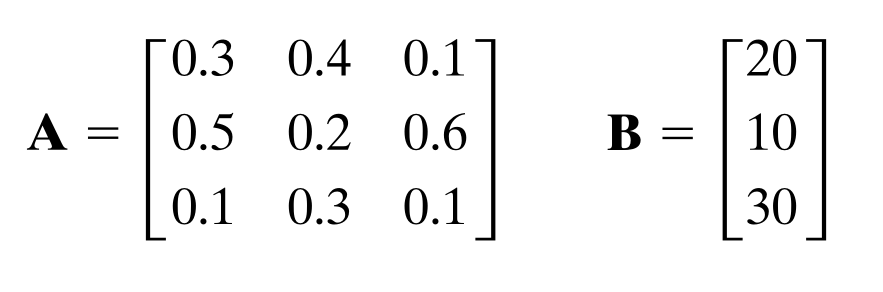